In [14]:
import matplotlib.pyplot as plt
import random as rd
from matplotlib.lines import Line2D

In [2]:
%run Postproseccing.ipynb

Jobs Information:
Turbine ID      Crew Needed    
3               1              
4               3              
5               6              
6               7              
7               4              
8               9              
Vessel Types Information:
Vessel ID  Battery Range   Operational Cost     Speed (Knots)             Passenger Capacity   Fixed Cost          
1          2000            1                    20                        10                   5000                
2          3000            2                    22                        15                   10000               
3          4500            3.5                  25                        25                   17000               


In [3]:

def show_the_map(problem,centerradius=200):
    grid = problem["Locations"]
    n_clusters = len(problem["ChargingStations"])
    
    fig, ax = plt.subplots()
    # Extract x, y, and tags
    x_values = [point[0] for point in grid.values()][1+n_clusters:]
    y_values = [point[1] for point in grid.values()][1+n_clusters:]
    tags = list(grid.keys())[1+n_clusters:]

    # Plot the points and annotate with tags
    ax.scatter(x_values, y_values, marker='o', color='black',facecolor='none')
    #for tag, x, y in zip(tags, x_values, y_values):
    #    ax.text(x, y, str(tag), color='red', fontsize=9, ha='right', va='bottom')
        
    for radius in range(100, 1410 + 1, 100):
        circle = patches.Circle((0, 0), radius, edgecolor='black', fill=False, linestyle='dotted', alpha=0.5)
        ax.add_patch(circle)
        
    # Plot the centers and annotate with tags
    if n_clusters>0:
        cluster_x_values = [point[0] for point in grid.values()][1:1+n_clusters]
        cluster_y_values = [point[1] for point in grid.values()][1:1+n_clusters]
        ax.scatter(cluster_x_values, cluster_y_values, marker='X', color='orange')
        #for tag, x, y in zip(range(1,n_clusters+1), cluster_x_values, cluster_y_values):
        #    ax.text(x, y, f"CS{str(tag)}", color='black', fontsize=9, ha='right', va='bottom')
        
    ax.text(0, 0, 'D(0)', color='red', fontsize=10,fontweight='bold', ha='right', va='bottom')

    # Set labels and title
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title('The problem map')
    
    ax.set_xlim(0, 1000)
    ax.set_ylim(0, 1000)
    
    circle = patches.Circle((0,0), centerradius, edgecolor = 'black',facecolor = 'lightgrey', alpha = 0.5)
    ax.add_patch(circle)

    # Show the plot
    return ax
    

def plot_tour_on_map(ax, grid:dict,tour:list,color):
    tour_x = [grid[node][0] for node in tour]
    tour_y = [grid[node][1] for node in tour]
    

    ax.plot(tour_x, tour_y, linestyle='--', color=color, linewidth=1)
    
    ax.set_title("Map with Tours")
    
    return ax
    
def plot_all_trips(ax, solution, problem):
    
    locations = problem["Locations"]
    sol,v,_ = solution
    colors = ['green','red','blue']
    
    trips = split_solution(sol)
    
    trips = [x for x in trips if x]
    v = [x for x in v if x!=0]
    
    
    for i in range(len(colors)):
        ax.plot([], [], color=colors[i], label=f'Vessel {i+1}')
        
        
    for i in range(len(trips)):
        
        
        trip = trips[i]
        vessel_id = v[i]-1
        
        trip = [(0,0)] + trip + [(0,0)]
        
        tour = [x[0] for x in trip]
        
        
        plot_tour_on_map(ax,locations,tour,colors[vessel_id])

    
    ax.legend()
    return ax


def plot_some_trips(ax,solution,problem,n):
    locations = problem["Locations"]
    sol,v,_ = solution
    colors = ['green','red','blue']
    
    trips = split_solution(sol)
    
    trips = [x for x in trips if x]
    v = [x for x in v if x!=0]
    
    
    for i in range(len(colors)):
        ax.plot([], [], color=colors[i], label=f'Vessel {i+1}')
        
    
    p = rd.sample(range(len(trips)),min(n,len(trips)))
    
    for i in p:
        
        
        trip = trips[i]
        vessel_id = v[i]-1
        
        
        trip = [(0,0)] + trip + [(0,0)]
        
        tour = [x[0] for x in trip]
        
        print(tour)
        
        plot_tour_on_map(ax,locations,tour,colors[vessel_id])
    
    ax.legend()
    return ax
    
           
        


In [4]:
test = make_problem(n_nodes_per_cluster=8, n_chargers=10,n_trips = 1,print_=False)


<Axes: title={'center': 'The problem map'}, xlabel='X-axis', ylabel='Y-axis'>

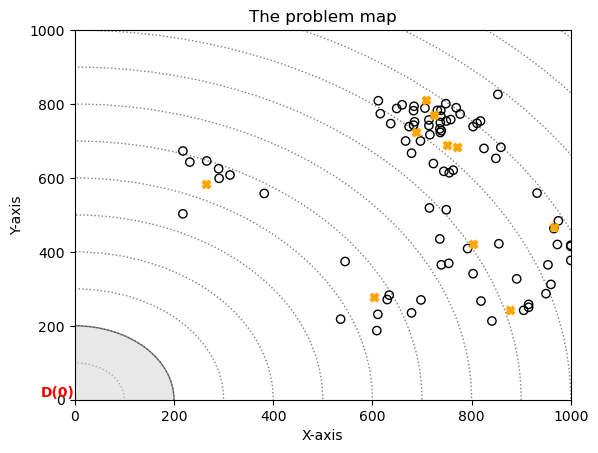

In [5]:
show_the_map(test)

In [6]:
def show_vessel_distribution(solution):
    
    sol,vessels,_ = solution
    v = [x for x in vessels if x!=0]
    
    
    # List of vessel IDs
    vessel_ids = v

    # Count the frequency of each vessel ID
    vessel_counts = [vessel_ids.count(vessel_id) for vessel_id in vessel_ids]

    # Plot the vessel frequency
    plt.bar(vessel_ids, vessel_counts)
    plt.xlabel('Vessel ID')
    plt.ylabel('Frequency')
    plt.title('Vessel Usage Frequency')

    plt.show()
    

In [7]:
def plot_output_lists(costs,all_weights,all_scores):    
    # Plotting costs
    plt.figure(figsize=(10, 6))
    plt.plot(costs, linewidth=1)
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title('Evolution of Costs')
    plt.show()

    # Plotting weights
    plt.figure(figsize=(10, 6))
    for i in range(len(all_weights[0])):
        plt.plot([weights[i] for weights in all_weights], label=f'Operator {i+1}')
    plt.xlabel('Segment')
    plt.ylabel('Weight')
    plt.title('Evolution of Weights')
    plt.legend()
    plt.show()

    # Sum of all weights
    sum_weights = [sum(weights) for weights in all_weights]
    plt.figure(figsize=(10, 6))
    plt.plot(sum_weights)
    plt.xlabel('Segment')
    plt.ylabel('Sum of Weights')
    plt.title('Evolution of Sum of Weights')
    plt.show()

    # Plotting scores
    plt.figure(figsize=(10, 6))
    for i in range(len(all_scores[0])):
        plt.plot([scores[i] for scores in all_scores], label=f'Operator {i+1}')
    plt.xlabel('Segment')
    plt.ylabel('Score')
    plt.title('Evolution of Scores')
    plt.legend()
    plt.show()

In [1]:
def plot_costs(cost_movement, title='Cost over iterations', save=False, save_name='costs.png'):
    fig, ax = plt.subplots(figsize=(16, 8))#
    ax.plot(cost_movement)
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Cost')
    ax.set_title(title)
    if save:
        plt.savefig(save_name)
    plt.show()
    
    return ax


In [3]:
def multiple_plots(plot1,plot2, title='Plots',save=False, save_name='multiple.png'):
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(plot1, color='blue')
    ax.plot(plot2, color='red')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Cost')
    ax.set_title(title)
    if save:
        fig.savefig(save_name)
    plt.show()
    
    return ax

In [9]:
def zoomed_plot(data,x_min,x_max,save=False,save_name='zoomed_plot.png'):
    
    fig,ax = plt.subplots(figsize=(24,14))
    
    ax.plot(data)
    
    ax.set_xlabel('Iteration',fontsize=22)
    ax.set_ylabel('Objective Value',fontsize=22)
    ax.set_ylim(0,max(data))
    ax.set_xlim(0,len(data))
    #Create inset plot
    ax_inset = fig.add_axes([0.35,0.35,0.5,0.5])
    ax_inset.plot(range(x_min,x_max), data[x_min:x_max], color='red',linewidth=1)
    ax_inset.set_xlim(x_min,x_max)
    ax_inset.set_ylim(min(data[x_min:x_max])*0.95,max(data[x_min:x_max])*1.05)
    
    bbox = ax_inset.get_position()

    # Transform the axes coordinates to data coordinates
    # Extract coordinates
    scaled_bbox_x0 = (bbox.x0-0.062) * len(data)
    scaled_bbox_y0 = (bbox.y0-0.04) * max(data)
    scaled_bbox_x1 = (bbox.x1+0.085) * len(data)
    scaled_bbox_y1 = (bbox.y1+0.105) * max(data)
    top_left_corner = (bbox.x0, bbox.y1)
    top_right_corner = (bbox.x0,bbox.y1)
    bottom_left_corner = (bbox.x0, bbox.y0)
    bottom_right_corner = (bbox.x1, bbox.y0)
    
    # Create the line
    line1 = Line2D([x_min, scaled_bbox_x0], [0,scaled_bbox_y0], linestyle='--', color='orange')
    line2 = Line2D([x_max, scaled_bbox_x1], [0,scaled_bbox_y0], linestyle='--', color='orange')
    line3 = Line2D([0, scaled_bbox_x0], [min(data[x_min:x_max]),scaled_bbox_y0], linestyle='--', color='orange')
    line4 = Line2D([0, scaled_bbox_x0], [max(data[x_min:x_max]),scaled_bbox_y1], linestyle='--', color='orange')
    
    
    ax.add_line(line1)
    ax.add_line(line2)
    ax.add_line(line3)
    ax.add_line(line4)
    
    ax.set_title('Plot of critical part of search',fontsize=22)
    
    if save:
        plt.savefig(save_name)

    
    plt.show()
    
    

In [2]:
def operators_scatter(deltas,highlight = range(10), save=False,save_name='operators_scatter.png'):
    
    
    
    
    x = [item[0] for item in deltas if item[2] in highlight]
    y = [item[1] for item in deltas if item[2] in highlight]
    operator_idx = [item[2] for item in deltas if item[2] in highlight]
    
    plt.figure(figsize=(20, 10))
    
    scatter = plt.scatter(x, y, c=operator_idx, cmap='tab10', edgecolor='k')
    plt.colorbar(scatter, label='Operator Index')

    # Adding labels and title
    plt.xlabel('Iteration Number')
    plt.ylabel('Difference in Objective Value')
    plt.title('Scatter Plot to highlight operator performance')
    plt.grid(True)
    plt.show()
    
    if save:
        plt.savefig(save_name)
    
    
    